# Visualizing spatial data with Python

## import libraries

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

import matplotlib.pyplot as plt

## import data

In [2]:
countries = geopandas.read_file("data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

## GeoPandas visualization functionality

### Basic plot

<AxesSubplot:>

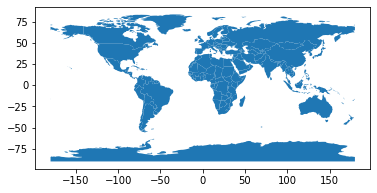

In [3]:
countries.plot()

### Adjusting the figure size

<AxesSubplot:>

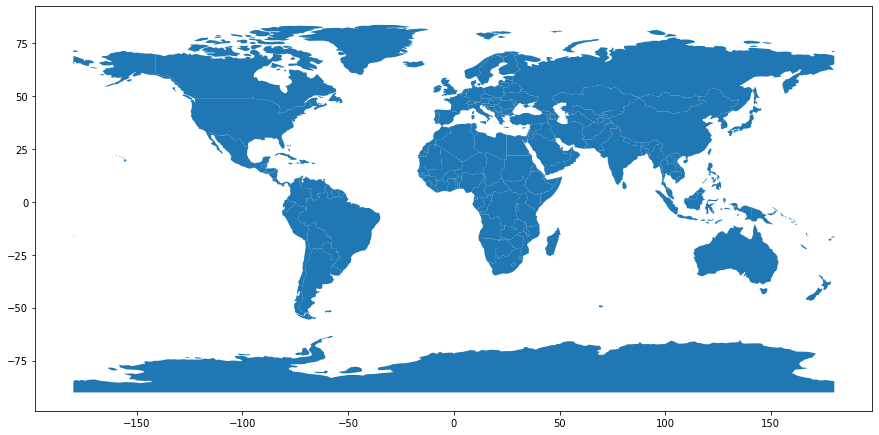

In [4]:
countries.plot(figsize=(15, 15))

### Removing the box / x and y coordinate labels

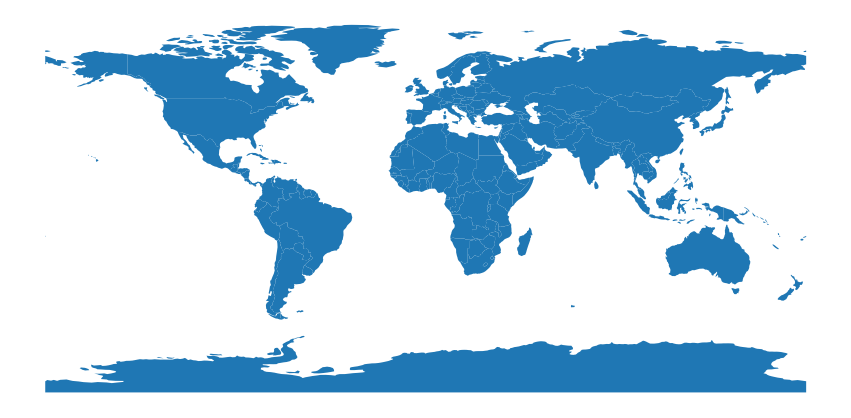

In [5]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

### Coloring based on column values

Let's first create a new column with the GDP per capita:

In [6]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]

In [7]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

C:\Users\HP\anaconda3\envs\gee\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


and now we can use this column to color the polygons:

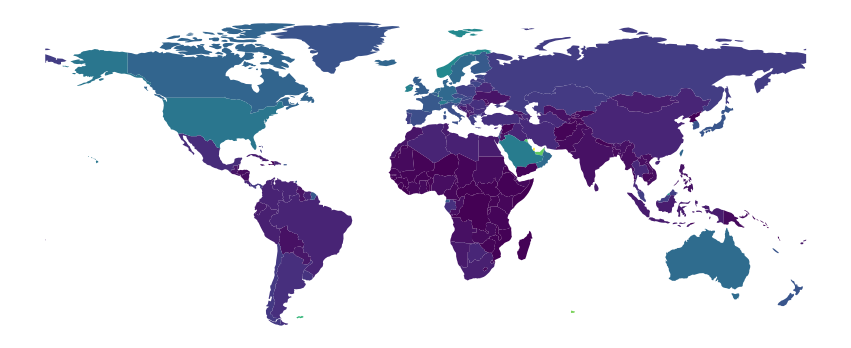

In [8]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

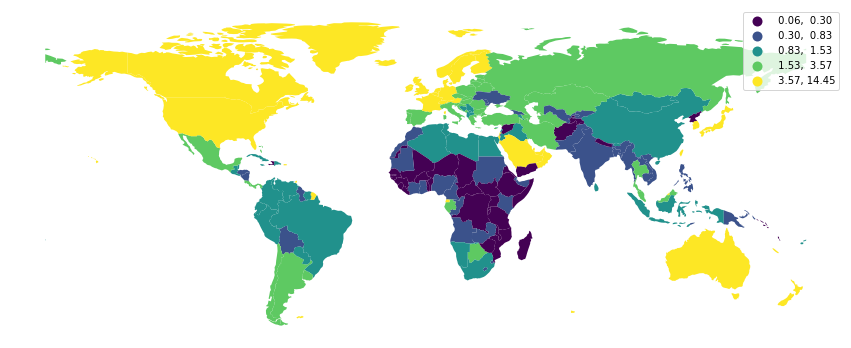

In [9]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

### Combining different dataframes on a single plot

The `.plot` method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the `ax=` keyword:

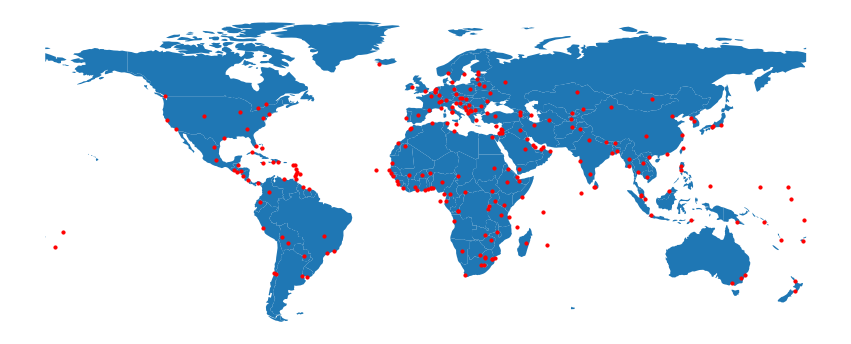

In [10]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(-20.0, 60.0), (-40.0, 40.0)]

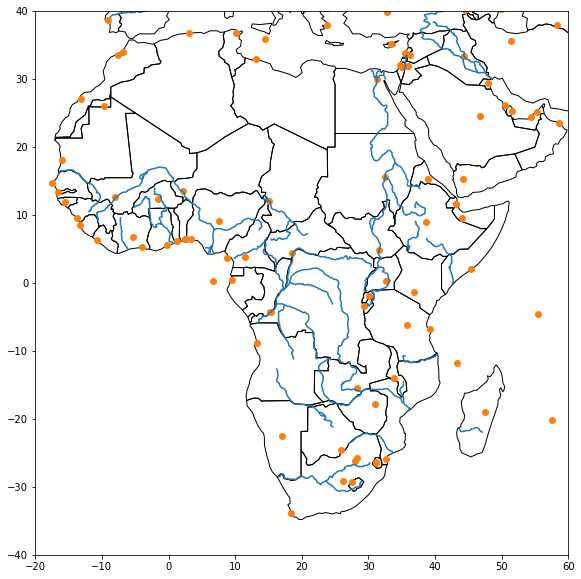

In [11]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Using `geoplot`

The `geoplot` packages provides some additional functionality compared to the basic `.plot()` method on GeoDataFrames:

- High-level plotting API (with more plot types as geopandas)
- Native projection support

https://residentmario.github.io/geoplot/index.html

In [12]:
import geoplot
import geoplot.crs as gcrs

C:\Users\HP\AppData\Local\Temp/ipykernel_1256/2001806137.py:7: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(True)


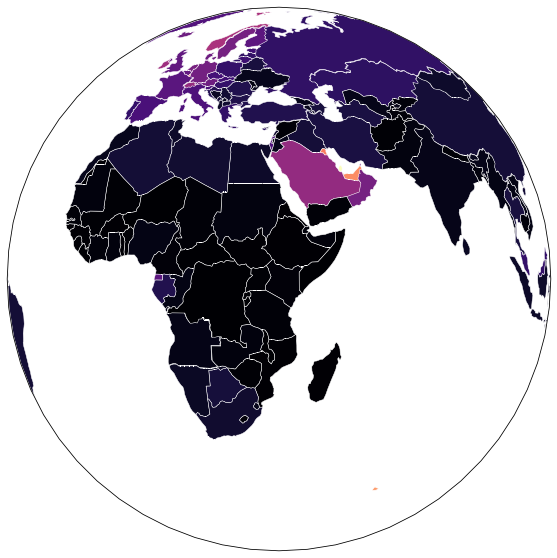

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=1.2921, central_longitude=36.8219)
})
geoplot.choropleth(countries, hue='gdp_per_cap', projection=gcrs.Orthographic(), ax=ax,
                   cmap='magma', linewidth=0.5, edgecolor='white')
ax.set_global()
ax.outline_patch.set_visible(True)
#ax.coastlines()

## Interactive web-based visualizations

There are nowadays many libraries that target interactive web-based visualizations and that can handle geospatial data. Some packages with an example for each:

Another popular javascript library for online maps is [Leaflet.js](https://leafletjs.com/), and this has python bindings in the [folium](https://github.com/python-visualization/folium) and [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) packages.

An example with folium:

In [16]:
import folium

In [17]:
m = folium.Map([0.0236,37.9062], zoom_start=4, tiles="OpenStreetMap")
folium.GeoJson(countries.to_json()).add_to(m)
m

In [18]:
m = folium.Map([0.0236,37.9062], zoom_start=4, tiles="OpenStreetMap")
folium.GeoJson(cities.to_json()).add_to(m)
m

thats for this notebook